In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import os
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

In [2]:
DATA_PATH = "../data/mind_large_train/"
NEWS_TRAIN_DATA_PATH = os.path.join(DATA_PATH, "news.tsv")
BEHAVIORS_TRAIN_DATA_PATH = os.path.join(DATA_PATH, "behaviors.tsv")

In [3]:
data = pd.read_csv(NEWS_TRAIN_DATA_PATH, sep="\t", header=None)

In [4]:
data.columns = ['news_id', 
            "category",
            "subcategory",
            "title",
            "abstract",
            "url",
            "title_entities",
            "abstract_entities"
]
data.shape

(101527, 8)

In [5]:
data.head()

news_id   category               subcategory  \
0  N88753  lifestyle           lifestyleroyals   
1  N45436       news  newsscienceandtechnology   
2  N23144     health                weightloss   
3  N86255     health                   medical   
4  N93187       news                 newsworld   

                                               title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1    Walmart Slashes Prices on Last-Generation iPads   
2                      50 Worst Habits For Belly Fat   
3  Dispose of unwanted prescription drugs during ...   
4  The Cost of Trump's Aid Freeze in the Trenches...   

                                            abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  Apple's new iPad releases bring big deals on l...   
2  These seemingly harmless habits are holding yo...   
3                                                NaN   
4  Lt. Ivan Molchanets peeked over a parapet of s...   

                                             url  \
0  https://assets.msn.com/labs/mind/AAGH0ET.html   
1  https://assets.msn.com/labs/mind/AABmf2I.html   
2  https://assets.msn.com/labs/mind/AAB19MK.html   
3  https://assets.msn.com/labs/mind/AAISxPN.html   
4  https://assets.msn.com/labs/mind/AAJgNsz.html   

                                      title_entities  \
0  [{"Label": "Prince Philip, Duke of Edinburgh",...   
1  [{"Label": "IPad", "Type": "J", "WikidataId": ...   
2  [{"Label": "Adipose tissue", "Type": "C", "Wik...   
3  [{"Label": "Drug Enforcement Administration", ...   
4                                                 []   

                                   abstract_entities  
0                                                 []  
1  [{"Label": "IPad", "Type": "J", "WikidataId": ...  
2  [{"Label": "Adipose tissue", "Type": "C", "Wik...  
3                                                 []  
4  [{"Label": "Ukraine", "Type": "G", "WikidataId...

In [6]:
data.isna().sum().sum()

5424

news_id                 0
category                0
subcategory             0
title                   0
abstract             5415
url                     0
title_entities          3
abstract_entities       6
dtype: int64

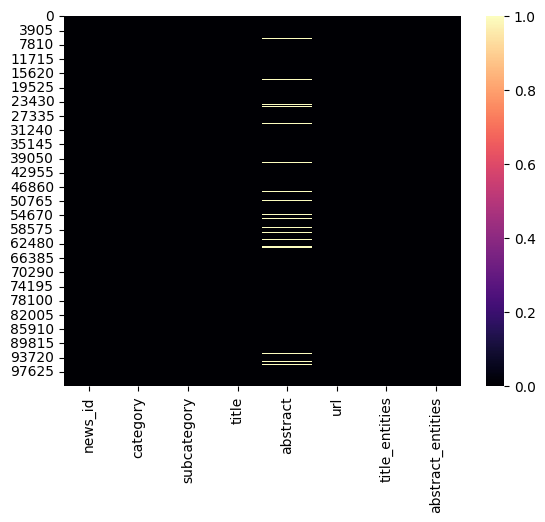

In [7]:
sns.heatmap(data.isnull(), cbar=True, cmap='magma')
data.isna().sum()

In [8]:
data.dropna(inplace=True)

In [9]:
data.sample(10)

news_id   category          subcategory  \
15687  N129196       news         newspolitics   
68780   N47715      video                 news   
44032  N107600     sports               tennis   
98379   N10250     health              medical   
82182   N51201  lifestyle        lifestylebuzz   
62554  N113866       news               newsus   
50322   N21607     sports         football_nfl   
11708   N71412  lifestyle  lifestyledidyouknow   
78696   N93879       news               newsus   
15778   N19399     sports         football_nfl   

                                                   title  \
15687   Correction: Election 2020-Senate-Tennessee story   
68780  'Off the rails' : Longtime Trump lawyer slams ...   
44032  Federer withdraws from Paris Masters as Cilic,...   
98379  Central Florida doctors warn of spike in local...   
82182        All the Best Looks from the 2019 CMA Awards   
62554  Milan, FBI may build shared firearms training ...   
50322  Tedy Bruschi Points Out Silver Lining Of Patri...   
11708             17 Ways Baby Boomers Changed the World   
78696  Ohio GOP lawmakers want to ban all abortions, ...   
15778   Lamar Jackson, Ravens defense shock the Seahawks   

                                                abstract  \
15687  NASHVILLE, Tenn. (AP)   In a story Oct. 16 abo...   
68780  In an exclusive interview with "The Beat," Don...   
44032  Roger Federer withdrew from the Paris Masters ...   
98379  Central Florida doctors are warning people to ...   
82182  Country music's big night always brings out th...   
62554  MILAN, MI -- The FBI may help pay for a firear...   
50322  At the very least the Patriots can chalk up Su...   
11708  Say what you will about baby boomers, but the ...   
78696  Republicans in the Ohio House of Representativ...   
15778  There were other Ravens besides Lamar Jackson ...   

                                                 url  \
15687  https://assets.msn.com/labs/mind/AAISTyr.html   
68780  https://assets.msn.com/labs/mind/AAIX2Gw.html   
44032  https://assets.msn.com/labs/mind/AAJuOs8.html   
98379  https://assets.msn.com/labs/mind/BBWIsCY.html   
82182  https://assets.msn.com/labs/mind/BBWKRLO.html   
62554  https://assets.msn.com/labs/mind/AAIWovD.html   
50322  https://assets.msn.com/labs/mind/AAJOGH6.html   
11708  https://assets.msn.com/labs/mind/AAIthkq.html   
78696  https://assets.msn.com/labs/mind/BBWOV7i.html   
15778  https://assets.msn.com/labs/mind/AAJ5dRW.html   

                                          title_entities  \
15687                                                 []   
68780  [{"Label": "Ukraine", "Type": "G", "WikidataId...   
44032  [{"Label": "Paris Masters", "Type": "U", "Wiki...   
98379                                                 []   
82182  [{"Label": "Country Music Association Awards",...   
62554  [{"Label": "Milan, Michigan", "Type": "G", "Wi...   
50322  [{"Label": "New England Patriots", "Type": "O"...   
11708  [{"Label": "Baby boomers", "Type": "C", "Wikid...   
78696  [{"Label": "Ohio Republican Party", "Type": "O...   
15778  [{"Label": "Baltimore Ravens", "Type": "O", "W...   

                                       abstract_entities  
15687  [{"Label": "Tennessee", "Type": "G", "Wikidata...  
68780  [{"Label": "Jay Goldberg", "Type": "P", "Wikid...  
44032  [{"Label": "Paris Masters", "Type": "U", "Wiki...  
98379                                                 []  
82182  [{"Label": "Country music", "Type": "B", "Wiki...  
62554  [{"Label": "Milan, Michigan", "Type": "G", "Wi...  
50322  [{"Label": "New England Patriots", "Type": "O"...  
11708  [{"Label": "Baby boomers", "Type": "C", "Wikid...  
78696  [{"Label": "Ohio Republican Party", "Type": "O...  
15778  [{"Label": "Baltimore Ravens", "Type": "O", "W...

In [10]:
data.loc[9237, "abstract_entities"]

'[{"Label": "Tiger Woods", "Type": "P", "WikidataId": "Q10993", "Confidence": 1.0, "OccurrenceOffsets": [0], "SurfaceForms": ["Tiger Woods"]}, {"Label": "PGA Tour", "Type": "O", "WikidataId": "Q910409", "Confidence": 1.0, "OccurrenceOffsets": [48], "SurfaceForms": ["PGA Tour"]}, {"Label": "Sam Snead", "Type": "P", "WikidataId": "Q945056", "Confidence": 1.0, "OccurrenceOffsets": [17], "SurfaceForms": ["Sam Snead"]}]'

In [11]:
from collections import Counter
import ast

# Convert string representation of dictionary to a list of dictionaries
data['title_entities'] = data['title_entities'].apply(ast.literal_eval)

In [54]:
import ast
import pandas as pd
import plotly.express as px

category_counts = {}
label_category_counter = Counter()
for entities, category, subcategory in zip(data['title_entities'], data['category'], data['subcategory']):
    unique_entities = set(entity['Label'] for entity in entities)
    for entity in entities:
        label_category_counter[(entity['Label'], category)] += 1
    category_key = (category, subcategory)
    if category_key in category_counts:
        category_counts[category_key] += len(unique_entities)
    else:
        category_counts[category_key] = len(unique_entities)

category_counts_df = pd.DataFrame({'category': [key[0] for key in category_counts.keys()],
                                   'subcategory': [key[1] for key in category_counts.keys()],
                                   'unique_entities_count': list(category_counts.values())})
label_category_freq_df = pd.DataFrame({'Label_Category': list(label_category_counter.keys()), 'Frequency': list(label_category_counter.values())})
label_category_freq_df[['Label', 'Category']] = pd.DataFrame(label_category_freq_df['Label_Category'].tolist(), index=label_category_freq_df.index)
label_category_freq_df = label_category_freq_df.sort_values('Frequency', ascending=False)

In [57]:
px.bar(data_frame=category_counts_df.sort_values('unique_entities_count', ascending=False), x="category", y="unique_entities_count", color="subcategory")

In [64]:
px.bar(category_counts_df.groupby('category')['unique_entities_count'].agg('sum').sort_values(ascending=False))

In [15]:
cat_counts = data["category"].value_counts()
px.bar(x=cat_counts.index, y=cat_counts.values)

In [16]:
c = data[["category", "subcategory"]].value_counts()
cat_subcat = list(zip(*c.keys()))
df = pd.DataFrame(columns=["cat", "subcat", "val"])
df["cat"] = cat_subcat[0]
df["sub_cat"] = cat_subcat[1]
df["val"] = c.values

In [23]:
label_category_freq_df.head()

Label_Category  Frequency                     Label  \
31                 (Donald Trump, news)       1708              Donald Trump   
7    (National Football League, sports)        841  National Football League   
150      (New England Patriots, sports)        806      New England Patriots   
175            (Houston Astros, sports)        706            Houston Astros   
372          (Cleveland Browns, sports)        505          Cleveland Browns   

    Category  
31      news  
7     sports  
150   sports  
175   sports  
372   sports

In [35]:
px.bar(label_category_freq_df.head(200), x='Category', y='Frequency', color='Label',
             labels={'Category': 'Category', 'Frequency': 'Frequency'},
             title='Histogram of Entity Frequencies by Category',
             hover_data=['Label'])

In [38]:
labels_appearing_in_multiple_categories = label_category_freq_df.groupby('Label').filter(lambda x: len(x) > 1)

In [46]:
px.bar(labels_appearing_in_multiple_categories.head(2000), x='Category', y='Frequency', color='Label',
             labels={'Category': 'Category', 'Frequency': 'Frequency'},
             title='Histogram of Entity Frequencies by Category',
             hover_data=['Label'])

In [18]:
px.bar(data_frame=df, x="cat", y="val", color="sub_cat")

In [65]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")
data["title_num_word"] = data['title'].apply(lambda title: len(tokenizer.tokenize(title)))
data["abstract_num_word"] = data['abstract'].apply(lambda title: len(tokenizer.tokenize(title)))

In [66]:
cat_abstract_words = data.groupby("category")["abstract_num_word"].mean()
cat_title_words = data.groupby("category")['title_num_word'].mean()

In [77]:
px.bar(cat_title_words.sort_values(ascending=False))

In [78]:
px.bar(cat_abstract_words.sort_values(ascending=False))

In [69]:
px.histogram(data['title_num_word'], color=data['category'])

In [71]:
px.histogram(data['abstract_num_word'], color=data['category'])

In [72]:
data[data["abstract"].str.startswith("A gallery of recent winners on the PGA Tour")]

news_id category subcategory             title  \
37  N35648   sports        golf  PGA Tour winners   

                                        abstract  \
37  A gallery of recent winners on the PGA Tour.   

                                              url  \
37  https://assets.msn.com/labs/mind/AAjnQjj.html   

                                       title_entities  \
37  [{'Label': 'PGA Tour', 'Type': 'O', 'WikidataI...   

                                    abstract_entities  title_num_word  \
37  [{"Label": "PGA Tour", "Type": "O", "WikidataI...               3   

    abstract_num_word  
37                  9

In [73]:
abstract_duplicates = data[data["abstract"].duplicated()]
abstract_duplicates[abstract_duplicates["abstract"].str.startswith("Being haunted does seem fitting")]

news_id category   subcategory  \
241    N20278   sports  football_nfl   
26661   N8569   sports  football_nfl   
27253  N86651   sports  football_nfl   
27458  N17620   sports  football_nfl   

                                                   title  \
241    Patriots' Kyle Van Noy amused over Sam Darnold...   
26661  Patriots' Kyle Van Noy amused over Sam Darnold...   
27253  Patriots' Kyle Van Noy amused over Sam Darnold...   
27458  Patriots' Kyle Van Noy amused over Sam Darnold...   

                                                abstract  \
241    Being haunted does seem fitting with Halloween...   
26661  Being haunted does seem fitting with Halloween...   
27253  Being haunted does seem fitting with Halloween...   
27458  Being haunted does seem fitting with Halloween...   

                                                 url  \
241    https://assets.msn.com/labs/mind/AAJaBXq.html   
26661  https://assets.msn.com/labs/mind/AAJasp8.html   
27253  https://assets.msn.com/labs/mind/AAJauTU.html   
27458  https://assets.msn.com/labs/mind/AAJav22.html   

                                          title_entities  \
241    [{'Label': 'Sam Darnold', 'Type': 'P', 'Wikida...   
26661  [{'Label': 'Sam Darnold', 'Type': 'P', 'Wikida...   
27253  [{'Label': 'Sam Darnold', 'Type': 'P', 'Wikida...   
27458  [{'Label': 'Sam Darnold', 'Type': 'P', 'Wikida...   

                                       abstract_entities  title_num_word  \
241    [{"Label": "New England Patriots", "Type": "O"...              10   
26661  [{"Label": "New England Patriots", "Type": "O"...              10   
27253  [{"Label": "New England Patriots", "Type": "O"...              10   
27458  [{"Label": "New England Patriots", "Type": "O"...              10   

       abstract_num_word  
241                   28  
26661                 28  
27253                 28  
27458                 28

In [74]:
data[data["title"].duplicated()]

news_id category          subcategory  \
241      N20278   sports         football_nfl   
409      N12095   sports         football_nfl   
430      N54430   sports         football_nfl   
1346     N38330   sports       basketball_nba   
1370     N18950   sports        football_ncaa   
...         ...      ...                  ...   
101424  N104747   travel        travelarticle   
101451   N93121  finance  finance-real-estate   
101480   N97038     news          newsoffbeat   
101508  N109606     news               newsus   
101510   N73678    video            lifestyle   

                                                    title  \
241     Patriots' Kyle Van Noy amused over Sam Darnold...   
409     Adrian Peterson had to 'hold back tears' in re...   
430     Wolverines in the NFL: Top performances from W...   
1346    Nets coach Kenny Atkinson explains use of Denn...   
1370    Michigan finally shows some fight, but can't s...   
...                                                   ...   
101424  VA, DC Good News: Nats Fans Engaged, Safest Ci...   
101451      Sunday Real Estate: 3 Luxurious Florida Homes   
101480  Humpback Whale Tail; Cop And Kitten Photo Shoo...   
101508  Still teaching at 95, Jimmy Carter draws devot...   
101510  Still teaching at 95, Jimmy Carter draws devot...   

                                                 abstract  \
241     Being haunted does seem fitting with Halloween...   
409     Adrian Peterson returned to Minnesota on Thurs...   
430     Below are notable performances from former Mic...   
1346    Kenny Atkinson went viral for a poster he thre...   
1370    UNIVERSITY PARK, Pa. -- Fans on their way out ...   
...                                                   ...   
101424  Good news on DC, NoVA Patches includes fans ge...   
101451  Sunday Real Estate takes you to Star Island, L...   
101480  It's your state; It's your shot. This is Calif...   
101508  PLAINS, Ga. (AP)   The pilgrims arrive early a...   
101510  Former President Jimmy Carter can still draw a...   

                                                  url  \
241     https://assets.msn.com/labs/mind/AAJaBXq.html   
409     https://assets.msn.com/labs/mind/AAJl4BQ.html   
430     https://assets.msn.com/labs/mind/AAJwpiP.html   
1346    https://assets.msn.com/labs/mind/AAJJcSV.html   
1370    https://assets.msn.com/labs/mind/AAJ47pp.html   
...                                               ...   
101424  https://assets.msn.com/labs/mind/BBWyymS.html   
101451  https://assets.msn.com/labs/mind/BBWyzQK.html   
101480  https://assets.msn.com/labs/mind/BBWz2Up.html   
101508  https://assets.msn.com/labs/mind/BBWzBrF.html   
101510  https://assets.msn.com/labs/mind/BBWzBzk.html   

                                           title_entities  \
241     [{'Label': 'Sam Darnold', 'Type': 'P', 'Wikida...   
409     [{'Label': 'Adrian Peterson', 'Type': 'P', 'Wi...   
430     [{'Label': 'National Football League', 'Type':...   
1346    [{'Label': 'Kenny Atkinson', 'Type': 'P', 'Wik...   
1370                                                   []   
...                                                   ...   
101424  [{'Label': 'Veterans Day', 'Type': 'H', 'Wikid...   
101451  [{'Label': 'Real estate', 'Type': 'U', 'Wikida...   
101480  [{'Label': 'California', 'Type': 'G', 'Wikidat...   
101508  [{'Label': 'Jimmy Carter', 'Type': 'P', 'Wikid...   
101510  [{'Label': 'Jimmy Carter', 'Type': 'P', 'Wikid...   

                                        abstract_entities  title_num_word  \
241     [{"Label": "New England Patriots", "Type": "O"...              10   
409     [{"Label": "Adrian Peterson", "Type": "P", "Wi...              11   
430     [{"Label": "Taco Charlton", "Type": "P", "Wiki...               9   
1346    [{"Label": "Kenny Atkinson", "Type": "P", "Wik...              10   
1370    [{"Label": "Beaver Stadium", "Type": "S", "Wik...              11   
...                                                   ...             ...

In [ ]:
# import httplib2
# from tqdm import tqdm
# import threading
# from typing import List, Iterator
# def check_url(link, valid_urls):
#     if int(resp[0]['status']) < 400:
#         print("exist")
#         valid_urls.append(link)


# def chunker_list(seq, size) -> Iterator[List[str]]:
#     for pos in range(0, len(seq), size):
#         yield seq[pos:pos + size]



# h = httplib2.Http()
# valid_urls = []
# for link in tqdm(data["url"].values):
#     resp = h.request(link, 'HEAD')
#     if int(resp[0]['status']) < 400:
#         print("exist")
#         valid_urls.append(link)
# # assert int(resp[0]['status']) < 400

In [ ]:
import pandas as pd
import numpy as np
import re
import json
# Load the news data
news_df = pd.read_csv(NEWS_TRAIN_DATA_PATH, sep='\t', header=None, names=['id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])
news_df = news_df.dropna(subset=['title', 'abstract'])
news_df['title'] = news_df['title'].apply(lambda x: x.lower())
news_df['abstract'] = news_df['abstract'].apply(lambda x: x.lower())

In [ ]:
behaviors = pd.read_csv(BEHAVIORS_TRAIN_DATA_PATH, sep="\t", header=None, names=["impression_id", "uid", ""])

In [ ]:
behaviors.shape

In [ ]:
behaviors